# Анализ рынка видеоигр

## Задача:

Для интернет-магазина компьютерных игр необходимо провести анализ рынка, выявить определяющие успешность игр закономерности, определить портрет пользователя для каждого из регионов, проверить рабочие гипотезы. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, помочь развитию бизнеса магазина.

Данные собраны из открытых источников и записаны в файл Games_sales.csv. Данные включают в себя информацию за период с 1983 по 2016 годы. 

**Описание данных `games.csv`:**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы долларов)
- `EU_sales` — продажи в Европе (миллионы долларов)
- `JP_sales` — продажи в Японии (миллионы долларов)
- `Other_sales` — продажи в других странах (миллионы долларов)
- `Critic_Score` — оценка критиков (от 0 до 100)
- `User_Score` — оценка пользователей (от 0 до 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Этапы выполнения проекта

1. [Получение данных](#Этап-1.-Получение-данных)
2. [Предобработка данных](#Этап-2.-Предобработка-данных)
3. [Исследовательский анализ данных](#Этап-3.-Исследовательский-анализ-данных)
4. [Портрет пользователя каждого региона](#Этап-4.-Портрет-пользователя-каждого-региона)
5. [Проверка гипотез](#Этап-5.-Проверка-гипотез)
6. [Итоговые выводы](#Этап-7.-Итоговые-выводы)

## Этап 1. Получение данных

Изучим данные, предоставленные для проекта.

In [169]:
# импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# настройка отображения графиков по умолчанию
sns.set_theme(rc = {'figure.figsize': '15, 8'},
              style = 'whitegrid', 
              font_scale = 1.2, 
              palette = 'pastel'
             )

Прочитаем файл games.csv и сохраним его в переменной df.

In [3]:
# чтение файла с данными с сохранением в df
df = pd.read_csv('Games_sales.csv')

In [4]:
# получение первых строк датасета
df.head()

,Unnamed: 0,Unnamed: 0.1,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
0,0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# настройка столбцов индексов
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [6]:
# получение общей информации о данных в таблице df
print(df.info(), '\n\n\n', df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   NA_Sales         16719 non-null  float64
 5   EU_Sales         16719 non-null  float64
 6   JP_Sales         16719 non-null  float64
 7   Other_Sales      16719 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10015 non-null  object 
 10  Rating           9950 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None 


                                Name Platform  Year_of_Release   Genre  \
count                         16717    16719     16450.000000   16717   
unique                        11562       31              NaN      12   
top     Need 

Всего в таблице 11 столбцов. Присутствуют два типа данных: non-null object (5 столбцов) и non-null float64 (6 столбцов).

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

### Выводы

Каждая строка таблицы содержит исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), год выпуска и присвоенный возрастной рейтинг.

Две проблемы, которые нужно решать на следующем этапе: пропуски и некачественные названия столбцов.

Для проверки рабочих гипотез особенно ценны столбцы Genre, Platform, Year_of_Release и разбивка продаж по регионам. По ним мы сможем отследить, как менялись предпочтения пользователей со времением, составить портрет пользователя каждого региона. Столбцы Critic_Score, User_Score, Rating помогут проверить гипотезы о влиянии рейтинга игр на продажи в зависимости от жанра и платформы выхода игр.

## Этап 2. Предобработка данных

Заменим названия столбцов, преобразуем данные в нужные типы, обработаем пропуски (с заполнением, где возможно), проверим данные на наличие дубликатов, а также посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Получаем перечень названий столбцов.

In [7]:
# перечень названий столбцов таблицы df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Названия столбцов с заглавной буквы, что не совсем удобно для доступа к данным. Переименуем столбцы для удобства дальнейшей работы. Проверим результат.

In [8]:
# переименование столбцов
df = df.rename(columns=lambda x: x.lower())

In [9]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Необходимо установить наличие дубликатов. Если найдутся, удаляем, и проверяем, все ли удалились.

In [10]:
# получение суммарного количества дубликатов в таблице df
df.duplicated().sum()

0

Дубликатов не обнаружено. Займемся пропущенными значениями.

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [11]:
# суммарное количество пропусков в таблице df
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8582
user_score         6704
rating             6769
dtype: int64

**Обработка пропусков данных в столбце 'name'**

Сперва посмотрим на строки с пропусками данных в столбце name.

In [12]:
# отбираем строки с пропусками данных в столбце name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких строк всего две. Более того данные строки содержат пропуски в других столбцах (genre, critic_score, user_score, rating) и относятся к играм 1993 года выпуска на платформе GEN. Таким образом, эти строки будем считать не релевантными и не способными существенно повлиять на результаты проводимого анализа, поэтому удалим данные строки.

In [13]:
# удаляем строки с пропусками данных в столбце name 
# делаем сброс индексов
df = df.dropna(subset=['name']).reset_index(drop=True)

In [14]:
# проверяем суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8580
user_score         6702
rating             6767
dtype: int64

Пропуски данных в столбце name теперь отсутствуют

**Обработка пропусков данных в столбце 'year_of_release'**

Посмотрим на пропуски данных в столбце year_of_release

In [15]:
# Посморим данные за какие года имеются в таблице
df.year_of_release.value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: year_of_release, dtype: int64

В таблице всего одна запись о игре, выпущенной в 202 году. Чтобы это могло быть?

In [16]:
df[df.year_of_release == 2020] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5935,Imagine: Makeup Artist,DS,2020.0,Simulation,0.27,0.0,0.0,0.02,NaN,tbd,E


Учитывая, что в таблице нету информации об играх, выпущенныех в 2018 и 2019 году, но есть только одна запись за 2020 и 3 за 2017, будем считать, что они не релевантны для анализа (возможно они попали сюда по ошибке)

In [17]:
# получаем индексы строк, которые надо дропнуть
index_year = df[(df.year_of_release == 2017) | (df.year_of_release == 2020)].index 
# дропаем выбранные строки
df.drop(index_year, inplace=True) 

In [18]:
# проверяем, что все прошло успешно
df.year_of_release.value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [19]:
# отбираем строки с пропусками данных в столбце year_of_release 
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16374,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16407,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16450,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16460,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас нет данных о годе выпуска 269 игр.
Заметим, что у части строк в названии игры присутствует год выпуска. Его можно использовать в качестве замены пропущенных данных для столбца year_of_release

Произведем поиск таких строк и создадим словарь, где в качестве ключа будет индекс строки в которой год выпуска присутствует в самом названии игры, а в качестве значения будет сам год выпуска.

In [20]:
idx_year = {}  # создаем пустой словарь

# итерируемся по строкам с отсутствием информации о годе
for row in df[df['year_of_release'].isna()].itertuples():
    for item in row.name.split(' '):  # разделяем название игры на отдельные слова
        if item == row.name.split(' ')[-1]:  # берем последнее слово из списка
            try:  # если последнее слово является числом то
                if len(item) == 2 or len(item) == 4: # проверяем его "длину"
                    item = int(item)  # преобразовываем тип данных
                    if item < 21:  # приводим года этого века к полной дате
                        item += 2000
                    elif item > 80 and item < 100: # приводим года прошлого века к полной дате
                        item += 1900
                    if item >= 1980:  # 1980 -- минимальное значение года в наших данных
                        idx_year[row.Index] = item
            except:  # если последнее слово не является числом то продолжаем итерировать по строкам
                continue
            
            
# проверяем выводом на экран получившийся словарь
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 183   | year: 2004
index: 377   | year: 2004
index: 475   | year: 2006
index: 1300  | year: 1999
index: 1649  | year: 2003
index: 2478  | year: 2007
index: 2848  | year: 2011
index: 3412  | year: 2006
index: 3485  | year: 2002
index: 4204  | year: 2007
index: 4774  | year: 2003
index: 5155  | year: 2003
index: 5654  | year: 2005
index: 5888  | year: 2003
index: 8918  | year: 2005
index: 13195 | year: 2011
index: 13929 | year: 2006
index: 15953 | year: 2008
index: 16079 | year: 2007
index: 16374 | year: 2008


Производим замену отсутствующих значений на полученные из названий игр года.

In [21]:
# итерирумся по словарю и производим замену
for key, v in idx_year.items():
    df.loc[key, 'year_of_release'] = v

Проверим данные на замены, выполненные на предыдущем шаге.

In [22]:
# отбираем строки с пропусками данных в столбце year_of_release 
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16349,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16407,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16450,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16460,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь у нас нет данных о годе выпуска 249 игр. Это меньше, чем после предудущей проверки, значит замены были выполнены успешно.
Найти года релиза игр для оставшихся 249 строк, возможно, получится с помощью парсинга страниц в интернете, но на данном этапе посчитаем возможным просто избавиться от этих строк и продолжить работу с имеющимся датасетом. т.к. 249 строк составляет всего порядка 1.49% от общего количества данных, что не должно в значительной степени сказаться на результатах исследования. Если же на каком-то этапе мы поймем, что данных нам будет не хватать, то мы вернемся к вопросу парсинга страниц в интернете для поиска недостающей информации.

In [23]:
# удаляем строки с пропусками данных в столбце year_of_release 
# делаем сброс индексов
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [24]:
# в добавок поменяем тип данных коллонки 'year_of_release'
df.year_of_release = df.year_of_release.astype('int64')

In [25]:
# проверяем суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64

Пропуски данных в столбце year_of_release теперь отсутствуют

**Обработка пропусков данных в столбце 'critic_score'**

Посмотрим на пропуски данных в столбце critic_score

In [26]:
# отбираем строки с пропусками данных в столбце critic_score
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16460,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16461,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16462,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас нет данных об оценке критиков для 8469 игр, что составляет порядка 51% игр.

Попробуем найти корреляцию в имеющихся данных между оценками критиков и:

- годом выхода игры (вдруг в какие-то годы критики были более благосклонны?)
- продажами в Северной Америке (na_sales)
- продажами в Европе (eu_sales)
- продажами в Японии (jp_sales)
- продажами в остальных регионах (other_sales)
- общими продажами по всему миру (global_sales)

Подсчитаем общие продажи для каждой из игр по всему миру (создадим новый столбец global_sales)

In [27]:
# суммируем продажи по регионам в новый столбец global_sales
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16460,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16461,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16462,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [28]:
print(df['year_of_release'].corr(df['critic_score']), '\n', 
      df['na_sales'].corr(df['critic_score']), '\n', 
      df['eu_sales'].corr(df['critic_score']), '\n',
      df['jp_sales'].corr(df['critic_score']), '\n',
      df['other_sales'].corr(df['critic_score']), '\n',
      df['global_sales'].corr(df['critic_score'])
      )

0.010353467558889726 
 0.24081751449345798 
 0.22133464515023316 
 0.15319263872334993 
 0.1989145677830181 
 0.24584356447587422


Корреляция слабая

Во всех рассмотренных случаях мы получили либо очень слабую, либо просто слабую корреляцию между рассмотренными признаками и оценкой критиков:

- минимальная 'год выпуска игры VS оценка критиков': 0.010..
- максимальная 'общие продажи во всем мире VS оценка критиков': 0.245..

Поэтому осреднять оценки критиков по одному из этих критериев для заполнения пропусков данных не представляется уместным.

**Обработка пропусков данных в столбце 'user_score'**

Теперь рассмотрим пропуски данных в столбце user_score.

Сперва посмотрим на значения в столбце user_score.

In [29]:
df.user_score.value_counts()

tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
1.3       2
0.9       2
0.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Наиболее часто встречающееся значение это не численная оценка пользователя, а строка 'tbd', означающая 'еще не определена' (от английского to be defined). В данной ситуации можно воспользоваться свойством среднего: если в датасет добавить число равное среднему, то новое среднее датасета не изменится, таким образом, мы можем заменить tbd на среднее точно так же, как и в случиях отсутствия значений NaN.

In [30]:
# производим замену 'tbd' на NaN
df = df.replace('tbd', np.nan)

In [31]:
# проверяем успешность замены суммарным количеством пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating             6682
global_sales          0
dtype: int64

Изменим тип данных 'user_score' со строки на числа с плавающей точкой

In [32]:
df['user_score'] = df.user_score.astype('float')

Проверяем успешность смены типа данных 'user_score'

In [33]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
global_sales       float64
dtype: object

Тип данных был заменен с object на float64. Теперь мы можем проводить математические операции с данными столбца user_score.

Попробуем найти корреляцию в имеющихся данных между оценками пользователей и другими переменными 

In [34]:
print(df['year_of_release'].corr(df['user_score']), '\n', 
      df['na_sales'].corr(df['user_score']), '\n', 
      df['eu_sales'].corr(df['user_score']), '\n',
      df['jp_sales'].corr(df['user_score']), '\n',
      df['other_sales'].corr(df['user_score']), '\n',
      df['global_sales'].corr(df['user_score']), '\n',
      df['critic_score'].corr(df['user_score'])
      )

-0.26826355995896933 
 0.08570745189151247 
 0.05526729130424236 
 0.1261741027726878 
 0.05701154340120889 
 0.08797432650715235 
 0.5792013058120701


Имеется средневыраженная кореляция между оценками критиков и оценками пользователей (0.58). Посмотрим на эти данные поближе

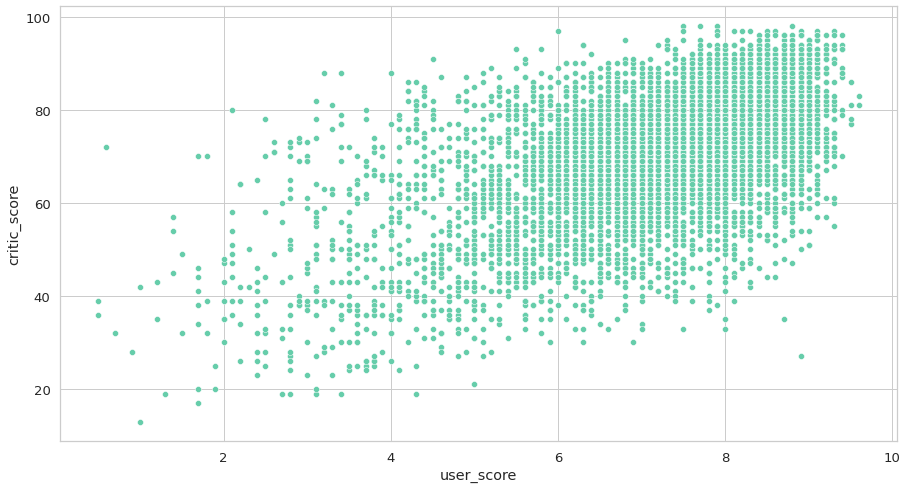

In [109]:
sns.scatterplot(data=df, x='user_score', y='critic_score', color='mediumaquamarine')

Во всех рассмотренных случаях мы получили либо очень слабую, либо просто слабую корреляцию между рассмотренными признаками и оценкой пользователей. Среднюю кореляцию удалось получить только между оценками пользователей и оценками критиков:

- минимальная 'продажив в Европе игры VS оценка пользователей': 0.055..
- максимальная 'оценка критиков VS оценка пользователей': 0.579..
    
Ни по одному из исследуемых признаков мы не получили высокой или очень высокой корреляции. Поэтому осреднять оценки пользователей по одному из этих критериев для заполнения пропусков данных не представляется уместным.


**Обработка пропусков данных в столбце 'rating'**

Так как rating является номинативной переменной, наиболее разумным будет заменить пропущеные значения на 'unknown'

In [36]:
# замена пропущенных значений в столбце 'rating' на строку 'unknown' специальным методом замены пустых значений
df['rating'] = df['rating'].fillna('unknown')

In [37]:
# <проверка: вычисление суммарного количества пропусков, выявленных в таблице df>
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating                0
global_sales          0
dtype: int64

После обработки пропусков, пропущенные значения остались в столбцах critic_score и user_score. Данных для того, чтобы восстановить эти пропуски, у нас недостаточно. Также мы видим, что пропуски в столбцах часто встречаются вместе, т.е. нет данных по одним и тем же играм. Это с большой долей вероятности связано с тем, что эти данные просто не были загружены в таблицу. После написания кратких выводов можно переходить к следующему этапу.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16464 entries, 0 to 16463
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16464 non-null  object 
 1   platform         16464 non-null  object 
 2   year_of_release  16464 non-null  int64  
 3   genre            16464 non-null  object 
 4   na_sales         16464 non-null  float64
 5   eu_sales         16464 non-null  float64
 6   jp_sales         16464 non-null  float64
 7   other_sales      16464 non-null  float64
 8   critic_score     7998 non-null   float64
 9   user_score       7476 non-null   float64
 10  rating           16464 non-null  object 
 11  global_sales     16464 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Выводы

На данном этапе были проведены замены названий столбцов на более удобные для дальнейшей работы, а также проведена работа по поиску и замене пропущенных значений.

Нам встретились пропущенные значения в столбцах name, year_of_release, critic_score, user_score и rating.

В столбце name было всего два пропуска, что не является критичным и может быть вызвано случайностью.

В столбце year_of_release количество пропусков также не было существено, часть значений удалось восстановить, взяв информацию непосредственно из названия игр, остальные данные были опущены, из-за их малого количества и невозможности повлиять на исследование в целом.

Пропуски значений critic_score и user_score составляют порядка половины данных и часто встречаются вместе. С большой вероятностью это говорит нам о том, что оценки для части игр не были выставлены или же просто не были загружены в таблицу. Была принята попытка восстановить пропущенные значения, найдя корреляцию с объемами продаж, однако, в результате корреляции оказались слабыми или очень слабыми. В итоге, пропуски решено было оставить, чтобы не искажать результаты исследования. Лучше работать с меньшим количеством данных, но хорошего качества.

Пропуски значений рейтинга игр были заменены на строку 'unknown', т.к. это номинативная переменная и не представляется возможным произвести оценку ее действительных значений для той или иной игры.

Заметная часть отсутствующих оценок и рейтингов была связана с годом релиза игры. Либо это 1980-ые годы, когда индустрия видео-игр не была столь развита, поэтому пропуски оценок и рейтингов кажутся логичными, либо это наиболее новые игры, которые еще не успели агрегировать оценки критиков и пользователей (включая, более 2000 строковых значений 'tbc').

Так же были посчитаны суммарные продажи во всех регионах с последующим сохранением значений в отдельный столбец 'global_sales'.

Данные подготовлены к дальнейшему анализу.

## Этап 3. Исследовательский анализ данных

Рассмотрим распределение игр по годам выпуска, оценим популярность игровых платформ в те или иные периоды времени, отберем актуальные данные для дальнейшей работы, построения прогнозов и выводов.

**Распределение игр по годам выпуска**

Посмотрим, сколько игр выпускалось в разные годы.

In [39]:
# группировка данных и подсчет количества выпущенных игр по годам
games_per_year = (df.groupby('year_of_release', as_index=False) 
                  .agg(games_number = ('name', 'count'))
                  )
games_per_year.head()

,year_of_release,games_number
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


Построим столбчатую диаграму распределения количества выпущенных игр по годам.

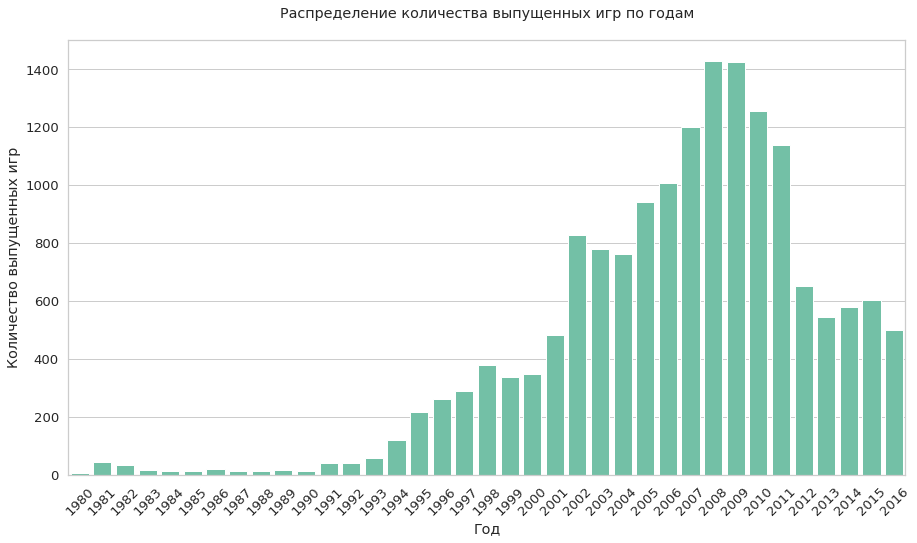

In [40]:
sns.barplot(data=games_per_year, y='games_number', x='year_of_release', color='mediumaquamarine')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Год')
plt.title('Распределение количества выпущенных игр по годам\n')
plt.xticks(rotation=45)
plt.show()

По графику видно, что основной объем игр был выпущен в первое десятилетие двадцать первого века с пиком в 2008-2009 годах. После 2011 года наблюдается значительный спад количества выпущенных игр (рост популярности социальных сетей?).

Оценим накопительный процент количества вышедших игр

In [41]:
# подсчитываем процентное соотношение для конкретного года
games_per_year['prcnt'] = 100 * games_per_year.games_number / games_per_year.games_number.sum()
# подсчитываем накопительный процент
games_per_year['prcnt_sum'] = games_per_year.prcnt.expanding(1).sum()
games_per_year.head()

,year_of_release,games_number,prcnt,prcnt_sum
0,1980,9,0.054665,0.054665
1,1981,46,0.279397,0.334062
2,1982,36,0.218659,0.552721
3,1983,17,0.103256,0.655977
4,1984,14,0.085034,0.741011


Построим накопительную диаграмму процента выпущенных игр

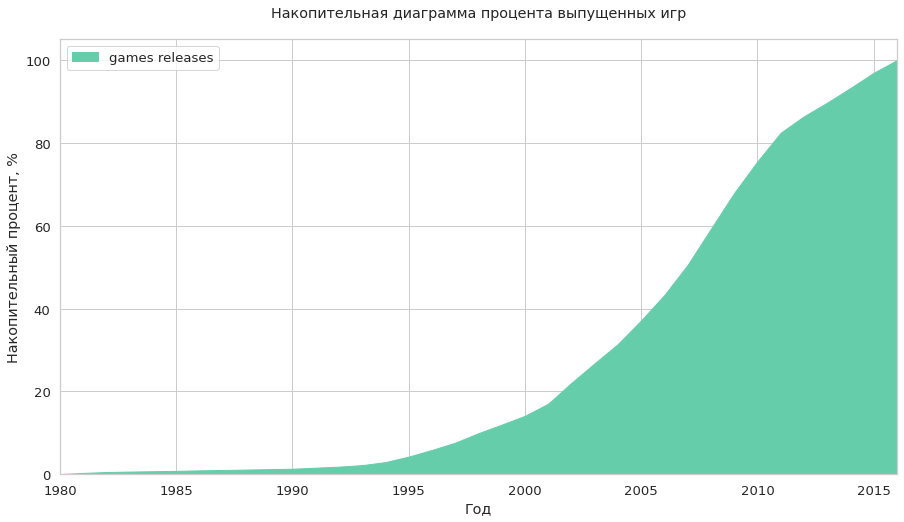

In [42]:
# преобразование данных
rnd = games_per_year.prcnt_sum.values
yrs = games_per_year.year_of_release.values

# построение и оформление графика
plt.stackplot(yrs, rnd, labels=['games releases'], color='mediumaquamarine')
plt.title('Накопительная диаграмма процента выпущенных игр\n')
plt.legend(loc='upper left')
plt.xlabel('Год')
plt.ylabel('Накопительный процент, %')
plt.xlim(xmin=yrs[0], xmax=yrs[-1])
plt.show()

По полученным данным хорошо видно, что за первую половину представленного периода (с 1983 по 1999 год) было выпущено порядка 11% от общего количества вышедших игр, а за вторую половину, оставшиеся 89%. Половина вышедших игр была выпущена в период с 2007 по 2016 годы. Таким образом, можно сделать вывод, что данные за 80-ые и 90-ые годы двадцатого века не имеют большого веса в количественном значении для имеющегося набора данных.

Посмотрим на динамику общих продаж.

In [50]:
# получим необходимый срез данных
df_sales = (df.groupby('year_of_release', as_index=False) 
            .agg({'global_sales': 'sum'}) 
            .sort_values('global_sales', ascending=False)
            )
            

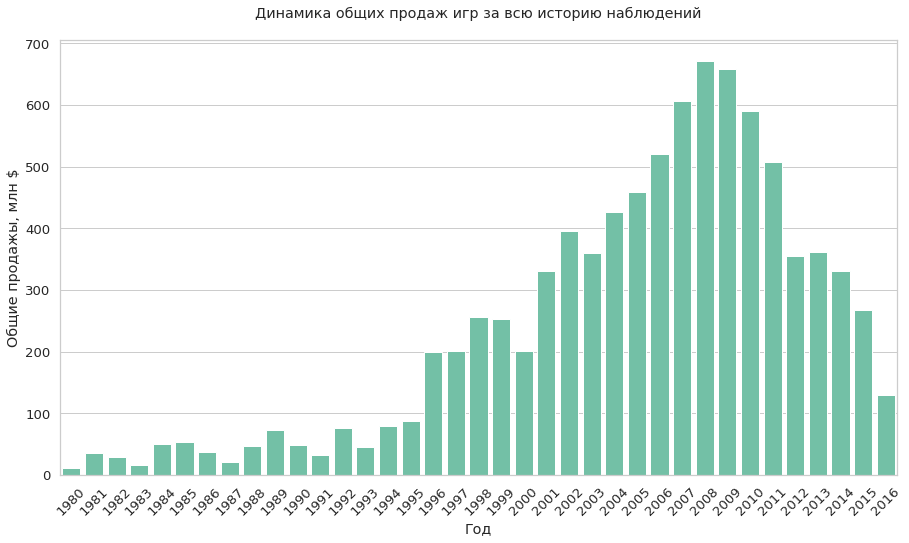

In [44]:
sns.barplot(data=df_sales, y='global_sales', x='year_of_release', color='mediumaquamarine')
plt.ylabel('Общие продажы, млн $')
plt.xlabel('Год')
plt.title('Динамика общих продаж игр за всю историю наблюдений\n')
plt.xticks(rotation=45)
plt.show()

Динамика общих продаж в целом хорошо повторяет динамику выхода новых игр, с пиком, приходящимся на 2008-2009 годы и с последующим спадом до значений начала двухтысячных годов, когда отрасль компьютерных игр была в начале подъема.

Далее рассмотрим распределение продаж по платформам. Определим модные в прошлом и популярные сейчас платформы. Оценим жизненный цикл платформ.

**Изменение продаж по платформам**

In [45]:
# подсчет продаж с группировкой по платформам
plt_sales = (df.groupby('platform', as_index=False).agg({'global_sales': 'sum'}) 
             .sort_values('global_sales', ascending=False)
             )

# вывод результата
plt_sales

,platform,global_sales
16,PS2,1247.28
28,X360,961.88
17,PS3,931.34
26,Wii,892.37
4,DS,802.79
15,PS,729.04
18,PS4,314.14
6,GBA,312.88
19,PSP,290.38
2,3DS,257.81


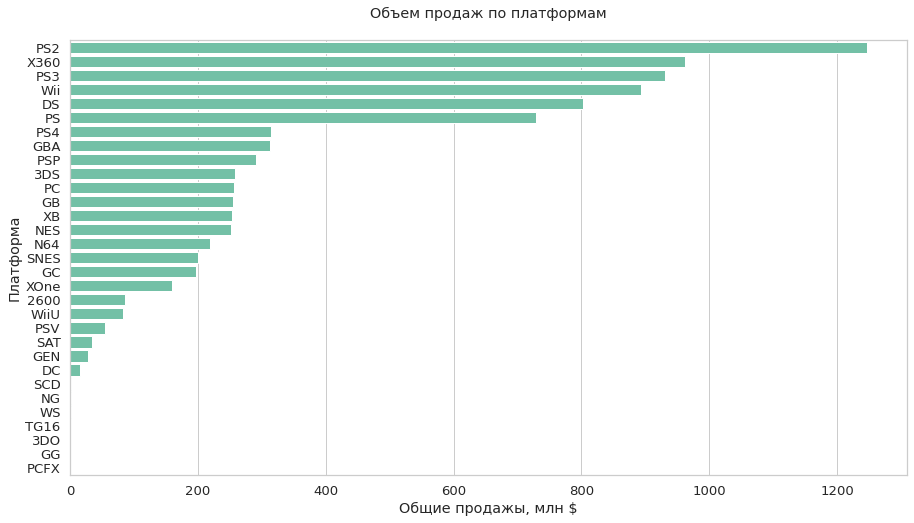

In [100]:
sns.barplot(data=plt_sales, x='global_sales', y='platform', orient='h', color='mediumaquamarine')
plt.xlabel('Общие продажы, млн $')
plt.ylabel('Платформа')
plt.title('Объем продаж по платформам\n')
plt.show()

ТОП по выручке довольно логичный - в первой семерке представлены самые популярные и конкурирующие семейства приставок: PlayStation (PS2, PS3, PS, PS4), Xbox (X360), Nintendo (Wii, DC), однако, бросается в глаза превосходство PlayStation - целых четыре приставки в ТОП - 7 по выручке. 

Также стоит отметить, что первая шестерка сильно обходит остальные платформы по выручке, так как, во первых, это действительно популярные платформы, а, во вторых, это платформы которые уже прожили и доживают свой срок жизни, т.е они приносят выручку более длительное время, чем платформы которые еще на начальном пути. Данные топ-7 платформ главный претендент для детального дальнейшего анализа. 

Для оценки динамики популярности платформ по годам отберем платформы суммарные продажи которых превышают значение 3 квантиля

In [47]:
platforms_above_3_quantile = plt_sales[plt_sales.global_sales > plt_sales.global_sales.quantile(0.75)]
platforms_above_3_quantile = list(platforms_above_3_quantile.platform) # создадим из отобранных платформ список
platforms_above_3_quantile

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']

In [48]:
# группировка данных по годам и платформам и подсчет суммарных мировых продаж
plt_sales_year = (df.query('platform in @platforms_above_3_quantile') 
                  .groupby(['year_of_release', 'platform'], as_index=False) 
                  .agg({'global_sales': 'sum'}) 
                  .sort_values('year_of_release', ascending=True)
                  )

plt_sales_year.head()

,year_of_release,platform,global_sales
0,1985,DS,0.02
1,1994,PS,6.03
2,1995,PS,35.96
3,1996,PS,94.70
4,1997,PS,136.17


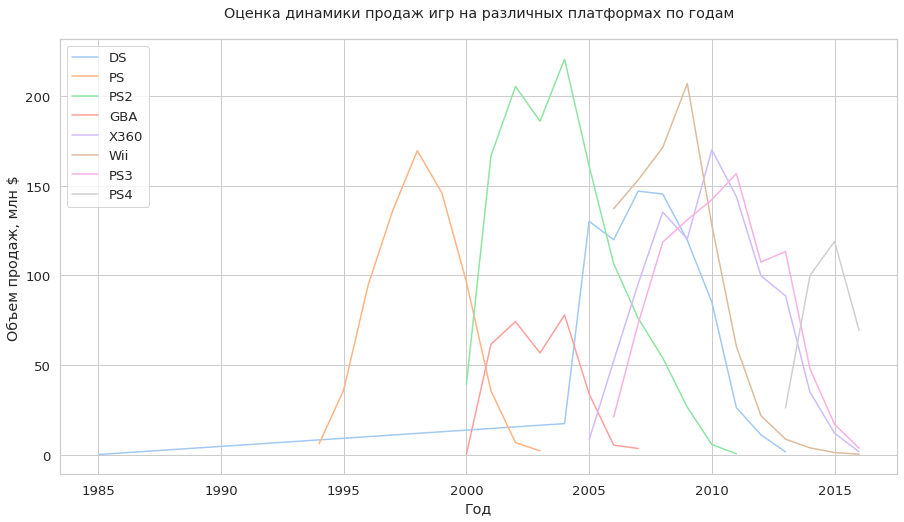

In [49]:
sns.lineplot(data=plt_sales_year, x='year_of_release', y='global_sales', hue='platform')
plt.xlabel('Год')
plt.ylabel('Объем продаж, млн $')
plt.title('Оценка динамики продаж игр на различных платформах по годам\n')
plt.legend(loc='upper left')
plt.show()

Как мы видим на графике, хоть PS2 и лидер всех времен и народов, но платформы и приставки обновляются и на сегодняшний день "в живых" и наиболее актульных на момент данной временной выборки находится PS4. Дата выхода этой платформы 2013 год. Соответсвенно для исследования возьмем временной промежуток с 2013г. по 2016г.

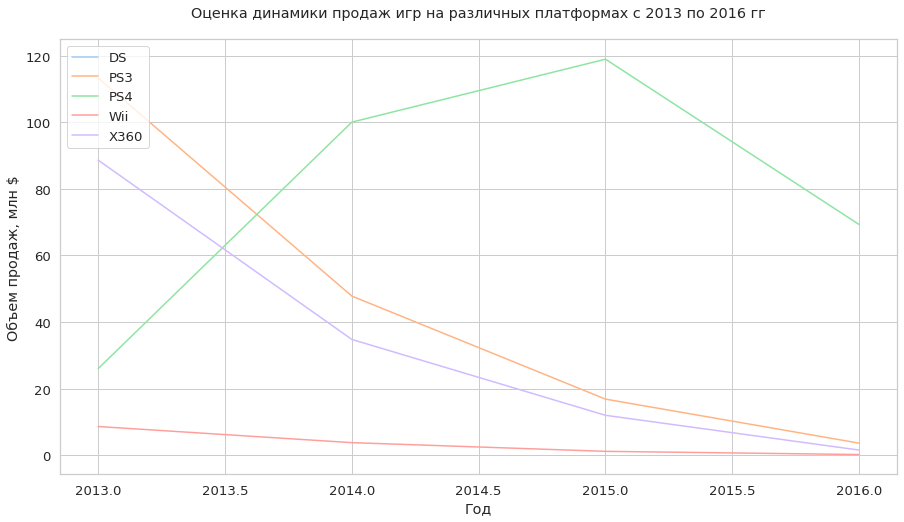

In [90]:
sns.lineplot(data=plt_sales_year.query('year_of_release >= 2013'), x='year_of_release', y='global_sales', hue='platform')
plt.xlabel('Год')
plt.ylabel('Объем продаж, млн $')
plt.title('Оценка динамики продаж игр на различных платформах c 2013 по 2016 гг\n')
plt.legend(loc='upper left')
plt.show()

Как и ожидалось, во временном промежутке 2013-2016 год по продажам лидирует PS4, в то время как остальные платформы сдают позиции.

Исследуем распределение **жизненного цикла платформ** по трем самых популярным и конкурирующим семействма платформ (платформы внутри семейств приходили друг другу на смену): playstation ('PS','PS2','PS3','PS4'), xbox ('XB','X360','XOne'), nintendo ('GC','Wii','WiiU')

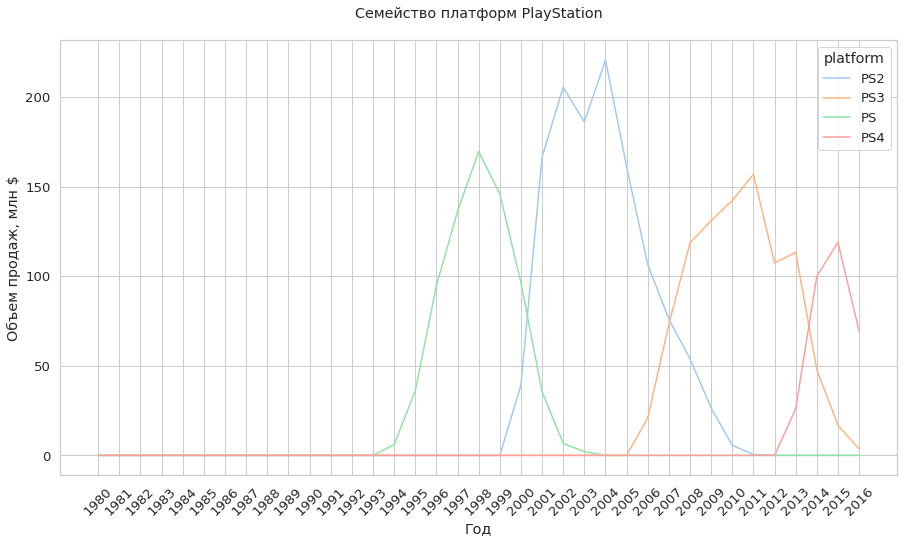

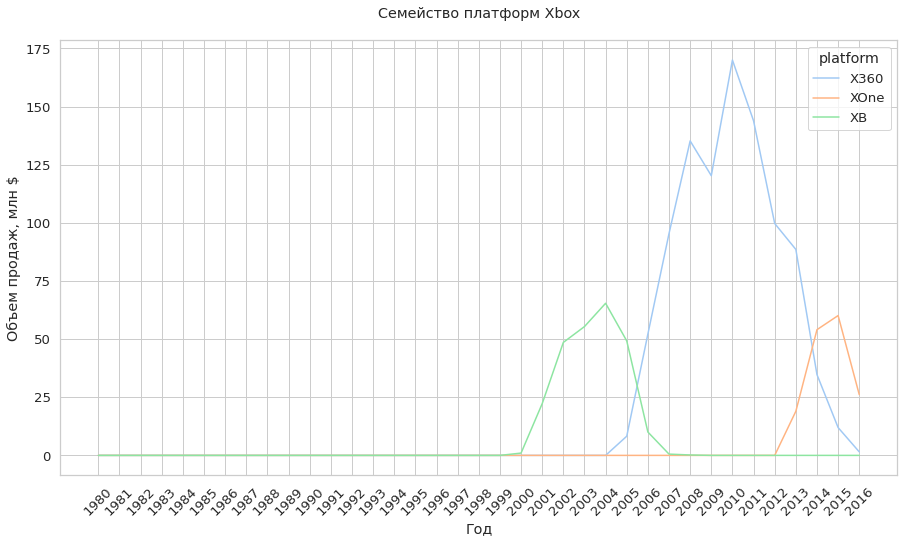

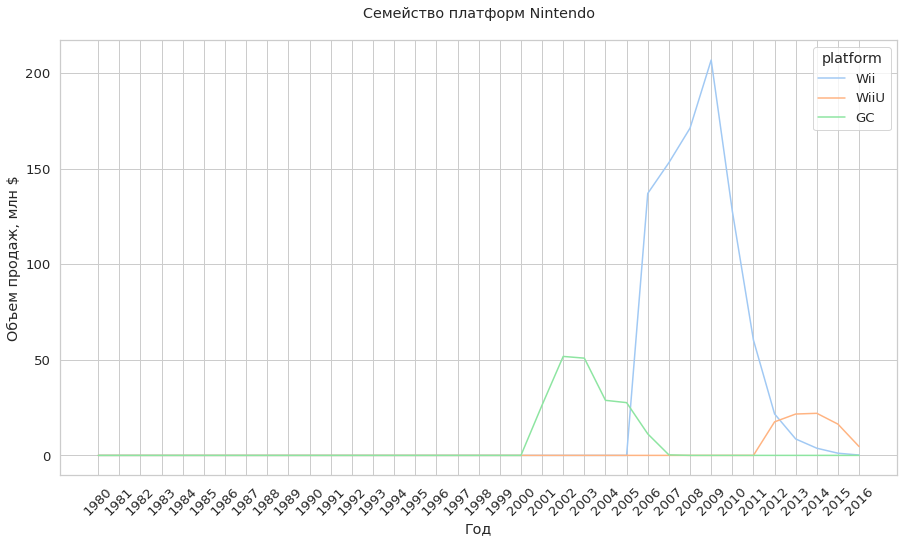

In [64]:
# создадим сводную таблицу на основании которой будем визуализировать данные
pivot_platform_year = (df.pivot_table(index='year_of_release',
                                      columns='platform',
                                      values='global_sales',
                                      aggfunc='sum'
                                      ).reset_index()
                       )
pivot_platform_year = pivot_platform_year.fillna(0)

# график для семейства платформ PlayStation
(pivot_platform_year.plot(x='year_of_release', 
                          y=['PS2','PS3','PS','PS4'], 
                          grid=True, 
                          xlabel='Год', 
                          ylabel='Объем продаж, млн $',
                          xticks=pivot_platform_year['year_of_release'],
                          title='Семейство платформ PlayStation\n'
                          )
)
plt.xticks(rotation=45)
plt.show()

# график для семейства платформ Xbox
(pivot_platform_year.plot(x='year_of_release', 
                          y=['X360','XOne','XB'],  
                          grid=True, 
                          xlabel='Год', 
                          ylabel='Объем продаж, млн $',
                          xticks=pivot_platform_year['year_of_release'],
                          title='Семейство платформ Xbox\n'
                          )
)
plt.xticks(rotation=45)
plt.show()

# график для семейства платформ Nintendo
(pivot_platform_year.plot(x='year_of_release', 
                          y=['Wii','WiiU','GC'], 
                          grid=True, 
                          xlabel='Год', 
                          ylabel='Объем продаж, млн $',
                          xticks=pivot_platform_year['year_of_release'],
                          title='Семейство платформ Nintendo\n'
                          ) 
)
plt.xticks(rotation=45)
plt.show()


Согласно построенным графикам, среднее время жизни платформы - от 7 до 12 лет; среднее время создание новых платформ внутри семейства (время между релизами платформ) - от 4 до 8 лет. Так же, из графиков можно сделать вывод, что у трех самых популярных семейств платформ стоит ожидать скорый выход новых платформ, так как с момента появления последних платформ внутри семейств прошло 4-5 лет.

Теперь построим график распределения жизненного цикла платформ, чтобы посмотреть статистику для всех платформ.

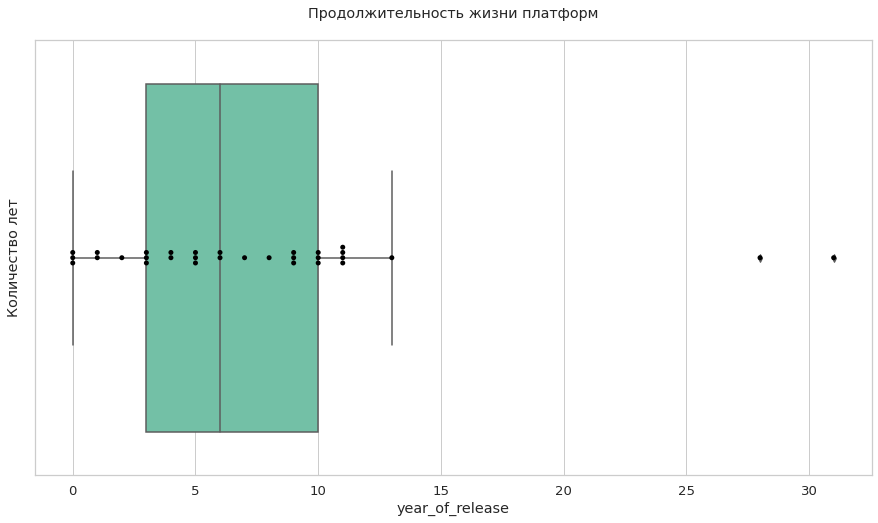

In [88]:
# вычисляем продолжительность жизни для каждой платформы 
life_span = df.groupby('platform').year_of_release.max() - df.groupby('platform').year_of_release.min()


# строим на одной оси два графика: боксплот + точки значений (swarmplot)
sns.boxplot(x=life_span, color='mediumaquamarine', orient='h')
sns.swarmplot(x=life_span, color='black', orient='h')
plt.title('Продолжительность жизни платформ\n')
plt.ylabel('Количество лет')
plt.show()

По графику видно, что присутствуют два выброса, в остальном, большая часть данных помещается внутрь межквартильного размаха. Из-за наличия выбросов будем использовать медианное значение, когда мы говорим о среднем значении жизненного цикла платформы.

In [83]:
# основные статистики продолжительности жизненного цикла платформ
life_span.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

По итогу средняя (медиана) продолжительность жизни платформы составляет 6 лет.

Исследуем **влияние отзывов** пользователей и критиков на успешность игры

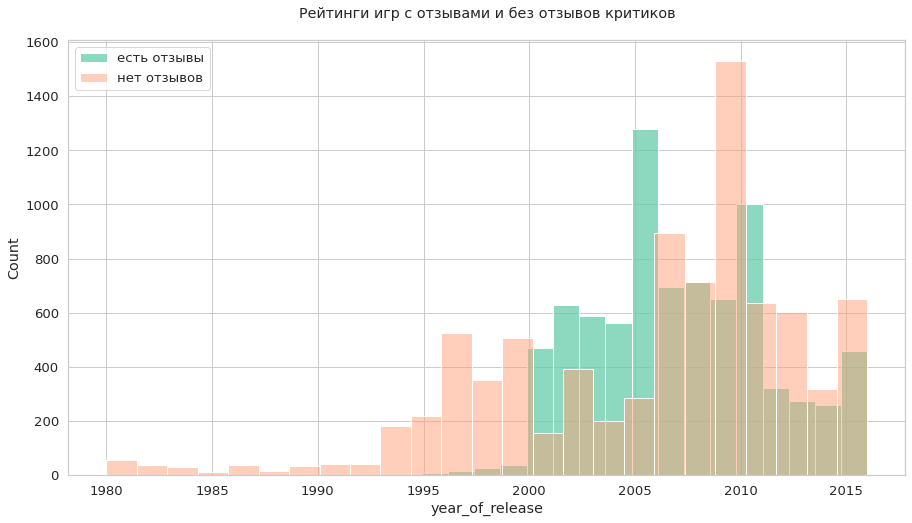

In [106]:
# построим график для игр с отзывами критиков и без 

(sns.histplot(df[df['critic_score'] > 0]['year_of_release'], 
              bins=25, 
              label='есть отзывы', 
              color='mediumaquamarine'
              )
) 

(sns.histplot(df[df['critic_score'].isna()]['year_of_release'], 
              bins=25, 
              alpha=0.5,
              label='нет отзывов', 
              color='lightsalmon'
              )
)

plt.title('Рейтинги игр с отзывами и без отзывов критиков\n')
plt.legend(loc='upper left')
plt.show()

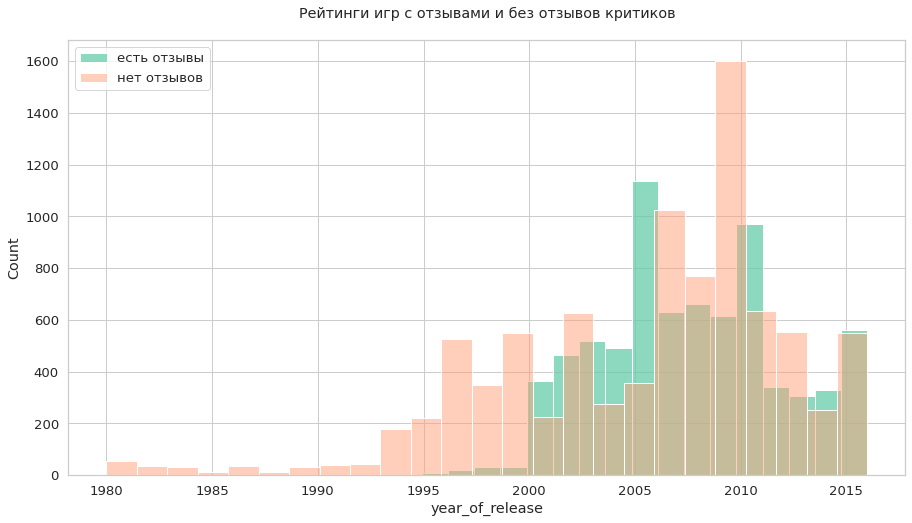

In [108]:
# построим график для игр с отзывами пользователей и без 

(sns.histplot(df[df['user_score'] > 0]['year_of_release'], 
              bins=25, 
              label='есть отзывы', 
              color='mediumaquamarine'
              )
) 

(sns.histplot(df[df['user_score'].isna()]['year_of_release'], 
              bins=25, 
              alpha=0.5,
              label='нет отзывов', 
              color='lightsalmon'
              )
)

plt.title('Рейтинги игр с отзывами и без отзывов критиков\n')
plt.legend(loc='upper left')
plt.show()

Картина с отзывами очень похожа. Вероятно, что критики учитывают мнение пользователей или пользователи прислушиваются к мнению критиков.

In [111]:
#посмотрим самые высокорейтинговые игры по версии критиков
df[df['critic_score'] > 0].sort_values(by='critic_score', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
5285,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T,0.34
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T,4.68
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
516,Metroid Prime,GC,2002,Shooter,1.96,0.67,0.10,0.09,97.0,9.3,T,2.82
129,Halo: Combat Evolved,XB,2001,Shooter,4.98,1.30,0.08,0.07,97.0,8.6,M,6.43
49,Super Mario Galaxy,Wii,2007,Platform,6.06,3.35,1.20,0.74,97.0,8.9,E,11.35
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


In [112]:
#посмотрим самые высокорейтинговые игры по версии пользователей
df[df['user_score'] > 0].sort_values(by='critic_score', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T,4.68
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
5285,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T,0.34
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1861,NFL 2K1,DC,2000,Sports,1.02,0.05,0.00,0.02,97.0,6.0,E,1.09
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
249,Tony Hawk's Pro Skater 3,PS2,2001,Sports,2.66,1.29,0.01,0.46,97.0,7.5,T,4.42
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
129,Halo: Combat Evolved,XB,2001,Shooter,4.98,1.30,0.08,0.07,97.0,8.6,M,6.43


Похоже, что вкусы у широкой аудитории и критиков немного расходятся. И не стоит забывать, что оценки и обзоры критиков могут быть частью проплаченной реклмной компании, а пользователи часто бывают троллями, которые намеренно портят отзывы на популярные игры.

In [116]:
#посмотрим корреляцию влияния на продажи
cor_score_sales = (df.corr()
                   .sort_values('global_sales', ascending=False)
                   .filter(items = ['global_sales'])
                   .reset_index()
                  )
cor_score_sales.style.background_gradient('coolwarm')

,index,global_sales
0,global_sales,1.000000
1,na_sales,0.941129
2,eu_sales,0.901350
3,other_sales,0.749201
4,jp_sales,0.612911
5,critic_score,0.245844
6,user_score,0.087974
7,year_of_release,-0.076367


На продажи отзывы критиков влияют чуть больше, чем отзывы пользователей, хотя в целом, значения лежат очень близко друг к другу. Меньше всего на продажи влияет год релиза игры.

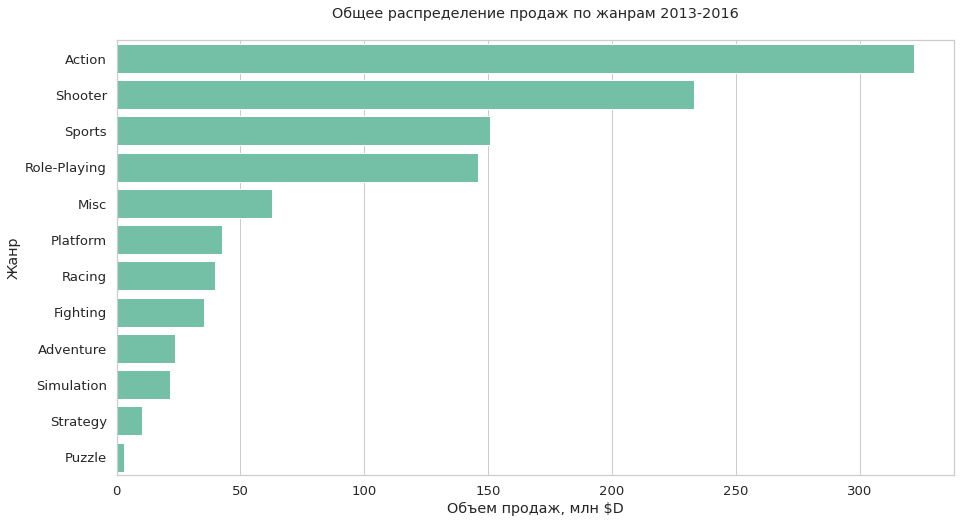

In [136]:
_df = (df.query('year_of_release >= 2013')
       .groupby('genre', as_index=False)
       .global_sales.sum()
       .sort_values('global_sales', ascending=False)
      ) # создаем датафрейм с данными за актуальные года 

# строим барплот
sns.barplot(y=_df.genre, 
            x=_df.global_sales, 
            orient='h', 
            color='mediumaquamarine'
           )
    

plt.xlabel('Объем продаж, млн $D')
plt.ylabel('Жанр')
plt.title('Общее распределение продаж по жанрам 2013-2016\n');
plt.show()

Самый популярный жанр - это Shooter. Не удивительно, ведь игра динамичная, может быть как для одного игрока, так и командная. Широко распространены соревнования в киберспорте по данному жанру. И не стоит забывать о легендарной игре "Doom", с которой, если можно так выразиться, все начиналось. Далее по популярности идут Sports, Platform, Action, Role-playing и Racing.

Посмотрим на популярность жанров на трех наиболее востребованных платформах - PS4, 3DS и XOne

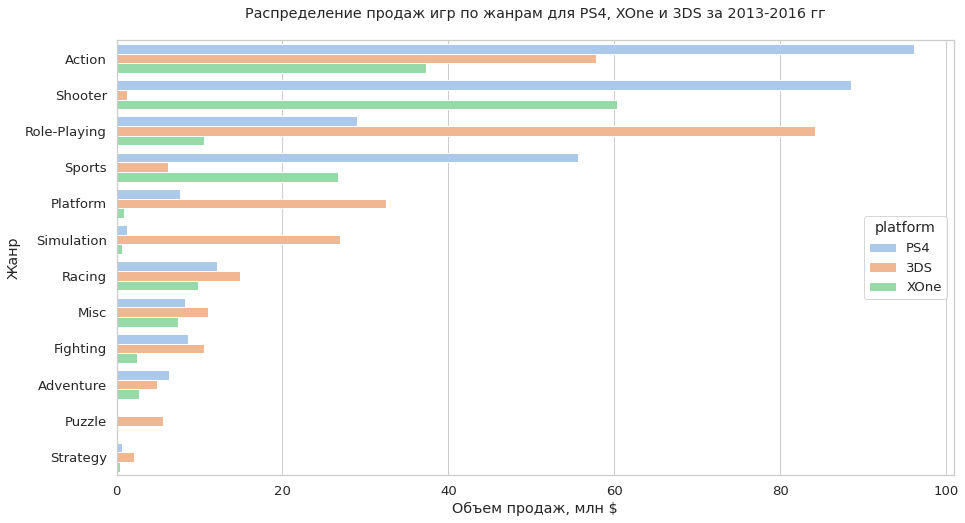

In [146]:
# подготавливаем данные для визуализации
popular_platforms = ['PS4', 'XOne', '3DS']
df_most_popular = df.query('platform in @popular_platforms') # датасет с 3 самыми популярными жанрами

genres_sales = (df_most_popular.groupby(['genre', 'platform'], as_index=False)
                .agg({'global_sales': 'sum'})
                .sort_values('global_sales', ascending=False)
               )

# строим барплот
sns.barplot(data=genres_sales, 
            x='global_sales', 
            y='genre', 
            hue='platform', 
            hue_order=['PS4', '3DS', 'XOne']
           )

plt.title('Распределение продаж игр по жанрам для PS4, XOne и 3DS за 2013-2016 гг\n')
plt.xlabel('Объем продаж, млн $')
plt.ylabel('Жанр')
plt.show()

По графику видно, что по жанровым предпочтениям сильно выделяется платформа 3DS. Например, жанр Shooter на ней вовсе не популярен, в то время, как Role-Playing занимает первое место с большим отрывом. Жанр Sports (4 место в общем рейтинге) наиболее популярен среди пользователей PS4.

### Выводы

На данном этапе был проведен исследовательский анализ данных. Определно количество игр выпускаемых в различные периоды (половина представленных игр была выпущена с 2007 по 2016 годы).

Отмечен средний жизненный цикл популярности игровых платформ (порядка 6 лет).

Определена корреляция между оценками критиков и оценками пользователей. В целом оценки критиков слабо коррелируются с продажами, а оценки пользователй и продажи имеют очень слабую корреляцию (практически нулевую).

Найдены наиболее популярные жанры игр за последние 5 лет (Action, Shooter и Role-Playing). Получена разбивка популярности жанров по платформам (предпочтения пользователей платформы 3DS выделяются на фоне других пользователей: например, таким пользователям совсем не интересен жанр игр Shooter, более чем популярный на других платформах).

## Этап 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона наиболее популярные платформы, наиболее популярные жанры, а также влияние рейтинга ESRB на продажи по регионам.

Возьмем наиболее актуальные данные, сделав выборку за последние 5 лет (начиная с 2012 года).

In [150]:
# отбираем данные за последние 5 лет
df_5 = df[df['year_of_release'] > 2012].reset_index(drop=True)

**Популярность платформ по регионам.**

In [151]:
# подгототавливаем данные для визуализации
df_5_region = (df_5[['platform', 'na_sales', 'eu_sales', 'jp_sales']] 
               .groupby('platform', as_index=False) 
               .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) 
               .melt(id_vars=['platform']) 
               .sort_values('value', ascending=False)
              )
df_5_region.head()

,platform,variable,value
15,PS4,eu_sales,141.09
4,PS4,na_sales,108.74
10,XOne,na_sales,93.12
9,X360,na_sales,81.66
14,PS3,eu_sales,67.81


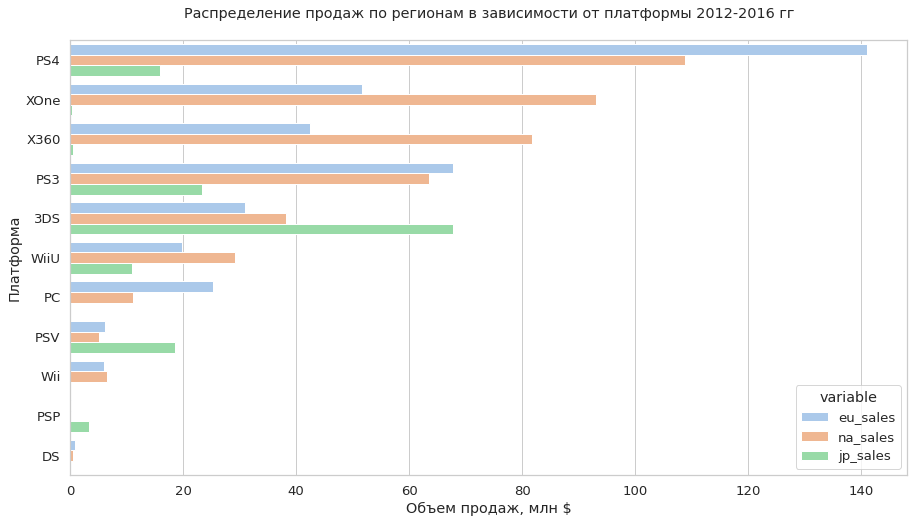

In [152]:
# делаем визуализацию
sns.barplot(data=df_5_region, 
            x='value',
            y='platform',
            hue='variable'
           )

plt.title('Распределение продаж по регионам в зависимости от платформы 2012-2016 гг\n')
plt.xlabel('Объем продаж, млн $')
plt.ylabel('Платформа')
plt.show()

Список Топ-5 платформ выглядит следующим образом:

1. PS4
2. XOne 
3. X360
4. PS3
5. 3DS

Отметим, что на Европейском рынке наиболее популярны платформы производителя Sony (PS4, PS3), в то время как в Северной Америке наибольшей популярностью пользуются игровые консоли Microsoft (X360 и ее последователь XOne). В Японии же самой популярной платформой является 3DS производства местной компании Nintendo.

**Популярность жанров по регионам.**

In [154]:
# подгототавливаем данные для визуализации
df_5_genre = (df_5[['genre', 'na_sales', 'eu_sales', 'jp_sales']] 
               .groupby('genre', as_index=False) 
               .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) 
               .melt(id_vars=['genre']) 
               .sort_values('value', ascending=False)
              )
df_5_genre.head()

,genre,variable,value
0,Action,na_sales,126.05
12,Action,eu_sales,118.13
8,Shooter,na_sales,109.74
20,Shooter,eu_sales,87.86
10,Sports,na_sales,65.27


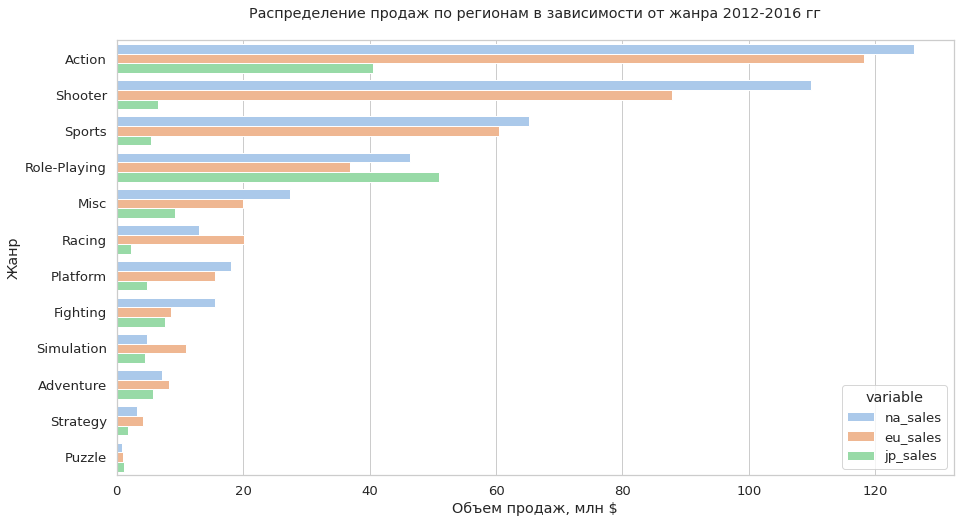

In [155]:
# делаем визуализацию
sns.barplot(data=df_5_genre, 
            x='value',
            y='genre',
            hue='variable'
           )

plt.title('Распределение продаж по регионам в зависимости от жанра 2012-2016 гг\n')
plt.xlabel('Объем продаж, млн $')
plt.ylabel('Жанр')
plt.show()

Список Топ-5 наиболее популярных жанров:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Отметим, что в Японии шутеры имеют значительно меньшую популярность в сравнении с Европой и Северной Америкой. На Японском архипелаге наибольшей популярностью обладают жанры Role-Playing и Action. Также стоит отметить, что суммарный объем продаж игр всех жанров в Северной Америке и Европе примерно сопоставим, в то время как на азиатском рынке он меньше более чем в два раза.

**Влияние рейтинга ESRB на продажи в различных региона.**

Рейтинги ESRB:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [160]:
# подгототавливаем данные для визуализации
df_5_rating = (df_5[['rating', 'na_sales', 'eu_sales', 'jp_sales']] 
               .groupby('rating', as_index=False) 
               .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) 
               .melt(id_vars=['rating']) 
               .sort_values('value', ascending=False)
              )
df_5_genre.head()

,genre,variable,value
0,Action,na_sales,126.05
12,Action,eu_sales,118.13
8,Shooter,na_sales,109.74
20,Shooter,eu_sales,87.86
10,Sports,na_sales,65.27


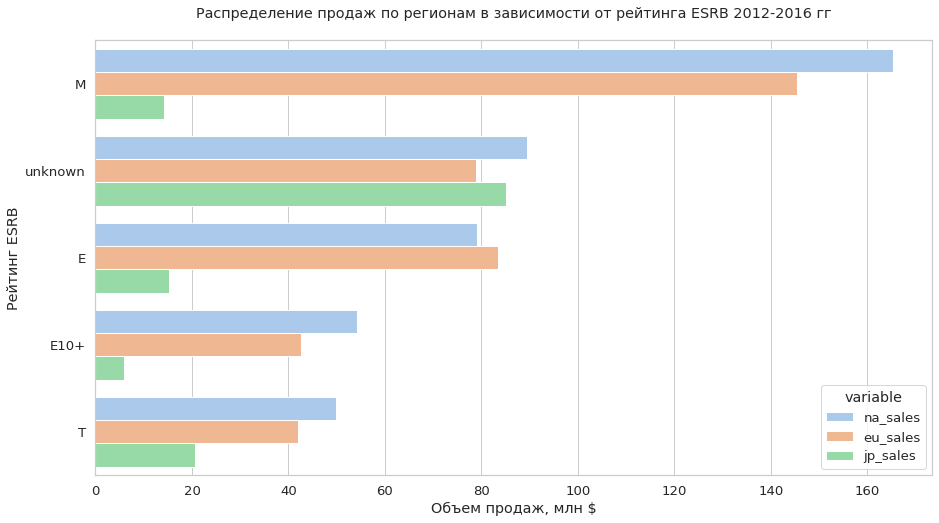

In [161]:
# делаем визуализацию
sns.barplot(data=df_5_rating, 
            x='value',
            y='rating',
            hue='variable'
           )

plt.title('Распределение продаж по регионам в зависимости от рейтинга ESRB 2012-2016 гг\n')
plt.xlabel('Объем продаж, млн $')
plt.ylabel('Рейтинг ESRB')
plt.show()

Игры, получившие возрастной рейтинг M (контент для взрослых) в два раза популярнее остальных категорий рейтинга на рынках Европы и Северной Америки. Остальные категории игр распределены относительно равномерно на этих рынках. В Японии же наибольшей популярностью, также превышающей в два раза преследователей, обладают игры возрастной рейтинг которых нам неизвестен ('unknown'). В первую очередь это может быть связано не столько с предпочтениями пользователей, а с тем, что организатор рейтинга (ESRB, Location: New York City, New York, U.S) не уделяет должного внимания играм выходящим локально на азиатском рынке.

### Выводы

После проведенного анализа можем заключить, что портрет пользователя регионов Северная Америка и Европа не сильно различается, в то время, как азиатские потребители выделяются по проанализированным параметрам (выбор платформы, любимый жанр, ситуация с рейтингом наиболее продаваемых игра). Следовательно стоит учитывать историко-культурные различия регионов, отражающиеся непосредственно в предпочтениях пользоватлей, при ведении бизнеса.

## Этап 5. Проверка гипотез

**Проверка гипотезы №1.**

H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H1: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [174]:
# произведем выборку требующихся для проверки гипотезы данных
sample_1 = df_5.query('platform == "XOne"').user_score.values
sample_2 = df_5.query('platform == "PC"').user_score.values

# убираем NaN значения из наших выборок
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# проверка равенства дисперсий
lv = ss.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Обе выборки имеют схожие дисперсии')
else:
    print('Дисперсии выборок различны. Будем использовать equal_var = False')
    param = False
    
# проведение t-test    
results = ss.ttest_ind(sample_1_na, sample_2_na, equal_var=param)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсии выборок различны. Будем использовать equal_var = False
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось. Таким образом, у нас имеются сильные основания полагать, что средние показатели рейтинга платформы Xbox One и PC одинаковые.

**Проверка гипотезы №2.**

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.

In [175]:
# произведем выборку требующихся для проверки гипотезы данных
sample_1 = df_5.query('genre == "Action"').user_score.values
sample_2 = df_5.query('genre == "Sports"').user_score.values

# убираем NaN значения из наших выборок
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# проверка равенства дисперсий
lv = ss.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Обе выборки имеют схожие дисперсии')
else:
    print('Дисперсии выборок различны. Будем использовать equal_var = False')
    param = False
    
# проведение t-test    
results = ss.ttest_ind(sample_1_na, sample_2_na, equal_var=param)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсии выборок различны. Будем использовать equal_var = False
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Нам удалось отвергнуть нулевую гипотезу. Таким образом, у нас имеются сильные основания полагать, что средние пользовательские рейтинги жанров Action и Sports различаются.

### Выводы

На данном этапе нам удалось проверить две гипотезы о средних пользовательских рейтингах. В результате проверки гипотез, мы теперь можем с большой долей уверенности полагать, что:

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports различны.


## Этап 7. Итоговые выводы

### Рабочие гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

### Общие выводы и рекомендации

**Перспективные игровые платформы** для 2017 и последующих лет: PSV, 3DS, PS4, XOne и WiiU, при этом большую долю в ассортименте 2017 г. должны занимать игры для PS4 и XOne, так как они приносят больше выручки. Эти платформы прожили примерно половину среднего периода жизни и способны еще ни один год приносить выручку за счет релизов игр, но тенденция к снижению исторической выручки у этих платформ и немалый возраст (при среднем возрасте создания новых платформ 4-8 лет) говорят о скором выпуске платформ новых поколений (в ближайшие 3-4 года, т.е 2019 - 2020 гг), таким образом, компании нужно граматно продумать стратегию на эти 3-4 года, чтобы после выхода новых платформ не иметь переизбытка неактуальных игр.

**Перспективные жанры** - это активные и динамичные жанры: Action, Sports, Shooter. Спокойные, нединамичные жанры и игры на логику: Adventure (Приключение, решение головоломок), Strategy, Puzzle (решение задач и головоломок) - занимают последние места по выручке и сильно отстают от тройки лидеров. Места между ТОП-3 и аутсайдерами занимают, также более динамичные жанры - Role-Playing, Racing, Fighting и другие. Таким образом, можно сделать вывод, что большей популярностью и спросом пользуются "стрелялки", спортивные симуляторы и ролевые игры (РПГ) (выводы справедливы для глобального рынка, рынок в Японии значительно отличается)

Что касается **оценок критиков и пользователей**, как показало исследование - это неосновной фактор на который нужно ориентироваться (явной зависимости выручки от оценок нет), однако, больше выручки и больше отдельных выдающихся по выручке игр приносят интервалы с оценками выше среднего. Если, всеже необходимо опираться на оценки при прогнозе 2107 года, то лучше использовать оценки критиков, от них выручка зависит больше.

**Региональные портреты** не сильно отличаются от глобального (общие тенденции сохраняются), однако, здесь есть некоторые нюансы (в особенности на рынке Японии) и для планирования ассортимента и рекламной компании по регионам стоит пользоваться региональными портретами:

**Европа (EU)**: самые популярные приставки - PS4 (48% выручки за 3 года), XOne (17% выручки), PS3 (9% выручки) - т.е. семейство PlayStation более популярно в Европе, чем конкуренты; самые популярные жанры - Action (28% выручки), Shooter (24% выручки), Sports (17% выручки); тройка самых продающихся возрастных категорий - M (для взрослых - 17+, 35% выручки), E (для любого возраста, 21% выручки), T (для подростков, 13+; 13% выручки).

**Северная Америка (NA)**: самые популярные приставки - PS4 (35% выручки за 3 года), XOne (29% выручки), X360 (10% выручки) - т.е. семейства PlayStation и Xbox близки по популярности в Северной Америке, но платформа PS4 и в Северной Америке на первом месте; самые популярные жанры - Shooter (28% выручки), Action (26% выручки), Sports (16% выручки); тройка самых продающихся возрастных категорий - M (для взрослых - 17+, 34% выручки), E (для любого возраста, 18% выручки), T (для подростков, 13+; 14% выручки).

**Япония (JP)**: самые популярные приставки - 3DS (48% выручки за 3 года), PS4 (16% выручки), PSV (16% выручки) - т.е семейство платформ XBox практически не представлено в Японии - платформ XBox нет даже в пятерке по выручке, а лидерами являются PlayStation и Nintendo), при этом *стоит отметить, что в Японии большей популярностью пользуются портативные приставки (3DS, PSV - 1 и 3 место топа),* а из домашних PS4 опять на первом месте; самые популярные жанры - Role-Playing (33% выручки), Action (32% выручки), Fighting (7% выручки); тройка самых продающихся возрастных категорий - T (для подростков, 13+; 16% выручки), E (для любого возраста; 10% выручки), M (для взрослых, 17+; 9% выручки), отметит, что *в отличие от Европы и Северной Америки жанра Sports нет даже в пятерке.*